In [1]:
# coding = utf-8

import torch
from torch import nn
import os
import data_load_for_Transformer as dlft
import BERT_pretraining_single
import BERTModel
import Utility
import imp
imp.reload(BERTModel)

<module 'BERTModel' from 'e:\\ML\\chatbot\\BERTChatBot_with_pretrained_model\\BERTModel.py'>

In [2]:
# print("Initiating the hyperparameters...")
# num_hiddens, num_layers, dropout, batch_size, num_steps = 32, 2, 0.1, 128, 16
# lr, num_epochs, device = 0.001, 2000, Utility.try_gpu()
# ffn_num_input, ffn_num_hiddens, num_heads = 32, 64, 4
# key_size, query_size, value_size = 32, 32, 32
# norm_shape = [32]

In [3]:
print("Initiating the hyperparameters...")
num_hiddens, num_layers, dropout, batch_size, num_steps = 128, 2, 0.1, 384, 16
lr, num_epochs, device = 0.001, 20, Utility.try_gpu()
ffn_num_input, ffn_num_hiddens, num_heads = 128, 128, 4
key_size, query_size, value_size = 128, 128, 128
norm_shape = [128]
using_bias = True

Initiating the hyperparameters...


In [4]:
print("Building the vocabulary...")
train_iter, vocab = dlft.load_data_xhj_for_Transformer(batch_size, num_steps, token='word', load=True)
len(train_iter), len(vocab)

Building the vocabulary...
['[PAD]', '[UNK]', '[CLS]', '[SEP]', '[MASK]', '你', '我', '的', '了', '是']


(1034, 25122)

In [5]:
print(vocab.to_tokens([0,1,2,3,4,5,6,7,8,9]))

['[PAD]', '[UNK]', '[CLS]', '[SEP]', '[MASK]', '你', '我', '的', '了', '是']


In [6]:
print("Rebuilding the Model...")

encoder = BERTModel.BERTEncoder( bert_name='./outputs/', hid_in_features=num_hiddens, num_outputs=num_hiddens)
decoder = BERTModel.TransformerDecoder(
    len(vocab), key_size, query_size, value_size, num_hiddens,
    norm_shape, ffn_num_input, ffn_num_hiddens, num_heads,
    num_layers, dropout)
net = BERTModel.EncoderDecoder(encoder, decoder)

try:
    checkpoint_prefix = os.path.join("model_data/model_bert.pt")
    checkpoint = torch.load(checkpoint_prefix)
    net.load_state_dict(checkpoint['model_state_dict'])
    print("Load model success")
except Exception as e:
    print("Can not load the model with error:", e)

print("Ready to working...")
def predict(src_sentence):
    return BERTModel.predict_seq2seq(net, src_sentence, vocab, vocab, num_steps,
                    device, save_attention_weights=False)


Some weights of the model checkpoint at ./outputs/ were not used when initializing AlbertModel: ['predictions.LayerNorm.bias', 'predictions.bias', 'predictions.dense.bias', 'predictions.dense.weight', 'predictions.decoder.bias', 'predictions.LayerNorm.weight', 'predictions.decoder.weight']
- This IS expected if you are initializing AlbertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertModel were not initialized from the model checkpoint at ./outputs/ and are newly initialized: ['albert.pooler.weight', 'albert.pooler.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predi

loss 0.168, 11972.0 tokens/sec on cuda:0


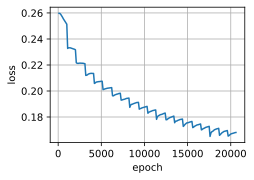

In [7]:
BERTModel.train_bert(net, train_iter, lr, num_epochs, batch_size, vocab, device)

In [8]:
predict("你好")

src ['你', '好']
src_tokens= [5, 14, 0]
tp_src_tokens [5, 14, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
enc_outputs tensor([[[-0.0161,  0.0149,  0.0141,  ...,  0.0179,  0.0021,  0.0259],
         [ 0.1923,  0.0501,  0.4003,  ...,  0.1770, -0.0722,  0.0479],
         [-0.0265,  0.2267, -0.0475,  ...,  0.1822,  0.0257, -0.3696],
         ...,
         [ 0.0080,  0.1606,  0.1830,  ...,  0.1686,  0.1921,  0.1738],
         [-0.0066,  0.0251,  0.0453,  ...,  0.0242,  0.0152,  0.0240],
         [-0.1266,  0.3164,  0.2175,  ...,  0.1031,  0.1469,  0.1589]]],
       device='cuda:0', grad_fn=<AddBackward0>)
dec_state [tensor([[[-0.0161,  0.0149,  0.0141,  ...,  0.0179,  0.0021,  0.0259],
         [ 0.1923,  0.0501,  0.4003,  ...,  0.1770, -0.0722,  0.0479],
         [-0.0265,  0.2267, -0.0475,  ...,  0.1822,  0.0257, -0.3696],
         ...,
         [ 0.0080,  0.1606,  0.1830,  ...,  0.1686,  0.1921,  0.1738],
         [-0.0066,  0.0251,  0.0453,  ...,  0.0242,  0.0152,  0.0240],
         [-0.126

'我 是 你 的 优 乐美 啊'